# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## DONE: Insert your surname, name and ID number

Student surname: Zinesi

Student name: Paolo
    
ID: 2053062

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

import pandas as pd

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2053062
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 61 63 52 59 65 45 75 54 65]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


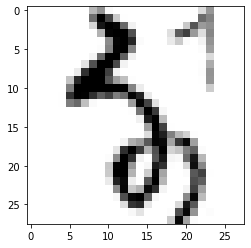

LABEL: 4
INPUT:


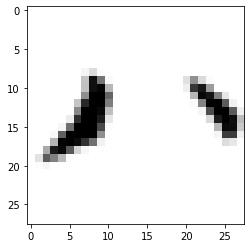

LABEL: 5
INPUT:


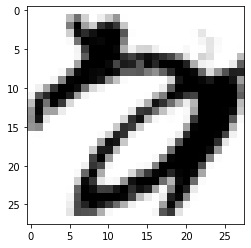

LABEL: 4
INPUT:


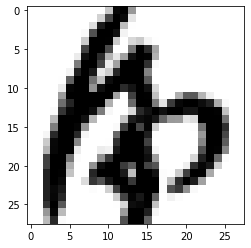

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## DONE 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM
linsvc = SVC(kernel="linear")
gsearch = GridSearchCV(linsvc, parameters, cv=4)
gsearch.fit(X_train,y_train)

print ('RESULTS FOR LINEAR KERNEL')
cvres = pd.DataFrame.from_dict(gsearch.cv_results_)
print(cvres)

print("\n\nBest parameters set found:")
print(gsearch.best_params_)

print("\nScore with best parameters:")
print(gsearch.best_score_)

print("\nMean test scores on the grid (see the first table for more details):")
print(cvres.loc[:,["params","mean_test_score"]])

RESULTS FOR LINEAR KERNEL
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.073917      0.031185         0.020649        0.010755    0.01   
1       0.037589      0.001080         0.009453        0.000569     0.1   
2       0.057610      0.023366         0.018213        0.011076       1   
3       0.049576      0.016435         0.011460        0.002248      10   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.720000               0.72           0.760000   
1   {'C': 0.1}           0.733333               0.74           0.733333   
2     {'C': 1}           0.733333               0.74           0.733333   
3    {'C': 10}           0.733333               0.74           0.733333   

   split3_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.766667         0.741667        0.021794                1  
1           0.746667         0.738333        0.005528                2  
2  

## DONE 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel
deg2svc = SVC(kernel="poly", degree=2)
gsearch = GridSearchCV(deg2svc, parameters, cv=4)
gsearch.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')
cvres = pd.DataFrame.from_dict(gsearch.cv_results_)
print(cvres)

print("\n\nBest parameters set found:")
print(gsearch.best_params_)

print("\nScore with best parameters:")
print(gsearch.best_score_)

print("\nMean test scores on the grid (see the first table for more details):")
print(cvres.loc[:,["params","mean_test_score"]])

RESULTS FOR POLY DEGREE=2 KERNEL
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.060019      0.008206         0.011252        0.000227    0.01   
1       0.062240      0.022181         0.017855        0.006958    0.01   
2       0.062258      0.027140         0.010318        0.000795    0.01   
3       0.056055      0.001763         0.013692        0.002438     0.1   
4       0.047721      0.000552         0.012816        0.002044     0.1   
5       0.052231      0.004576         0.012157        0.001865     0.1   
6       0.047472      0.001531         0.010590        0.001718       1   
7       0.048794      0.002466         0.011549        0.001279       1   
8       0.051535      0.002096         0.012099        0.001190       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.01, 'gamma': 0.01}           0.120000   
1         0.1   {'C': 0.01, 'gamma': 0.1}           0.786667   
2           1     {'C': 

## DONE 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

degNsvc = SVC(kernel="poly", degree=degree)
gsearch = GridSearchCV(degNsvc, parameters, cv=4)
gsearch.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')
cvres = pd.DataFrame.from_dict(gsearch.cv_results_)
print(cvres)

print("\n\nBest parameters set found:")
print(gsearch.best_params_)

print("\nScore with best parameters:")
print(gsearch.best_score_)

print("\nMean test scores on the grid (see the first table for more details):")
print(cvres.loc[:,["params","mean_test_score"]])

RESULTS FOR POLY DEGREE= 3  KERNEL
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.065904      0.007249         0.013586        0.001266    0.01   
1       0.052192      0.000800         0.010137        0.000631    0.01   
2       0.055269      0.003098         0.011638        0.001346    0.01   
3       0.059899      0.000725         0.015429        0.002816     0.1   
4       0.057642      0.003510         0.011064        0.000834     0.1   
5       0.050608      0.001159         0.009439        0.000343     0.1   
6       0.049560      0.001222         0.009799        0.000148       1   
7       0.054828      0.003265         0.011966        0.003458       1   
8       0.086290      0.029861         0.018808        0.006980       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.01, 'gamma': 0.01}           0.120000   
1         0.1   {'C': 0.01, 'gamma': 0.1}           0.793333   
2           1     {'C'

## DONE 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel
rbfsvc = SVC(kernel="rbf")
gsearch = GridSearchCV(rbfsvc, parameters, cv=4)
gsearch.fit(X_train,y_train)

print ('RESULTS FOR rbf KERNEL')
cvres = pd.DataFrame.from_dict(gsearch.cv_results_)
print(cvres)

print("\n\nBest parameters set found:")
print(gsearch.best_params_)

print("\nScore with best parameters:")
print(gsearch.best_score_)

print("\nMean test scores on the grid (see the first table for more details):")
print(cvres.loc[:,["params","mean_test_score"]])

RESULTS FOR rbf KERNEL
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.067592      0.003482         0.031300        0.002869     0.1   
1        0.072859      0.003532         0.031948        0.002079     0.1   
2        0.068495      0.002769         0.028472        0.001470     0.1   
3        0.134923      0.094637         0.056758        0.029329     0.1   
4        0.055231      0.001213         0.026301        0.000643       1   
5        0.086838      0.037019         0.040369        0.014905       1   
6        0.073462      0.003620         0.031760        0.002562       1   
7        0.072207      0.003542         0.031075        0.002791       1   
8        0.043329      0.003137         0.024442        0.000935      10   
9        0.077070      0.018258         0.035126        0.015019      10   
10       0.077296      0.006623         0.032499        0.004474      10   
11       0.099635      0.030980         0.040449        0.018459 

## QUESTION 1 (DONE)
What do you observe when using linear, polynomial and RBF kernels on this dataset ? <br>
**The linear score is about 0.74, the 2nd-degree polynomial score is about 0.78 while the higher degree plynomial have a lower score. So, increasing the polynomial degree does not lead to an higher score (as one would expect). However, the best kernel of the proposed ones is the rbf kernel, with a score of 0.815.**

## DONE 5
Report here the best SVM kernel and parameters

In [12]:
# get training and test error for the best SVM model from CV
best_param = {'C': 10, 'gamma': 0.01}
best_SVM = SVC(kernel="rbf", C=best_param['C'], gamma=best_param['gamma'])
best_SVM.fit(X_train,y_train)

# compute errors
training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1- best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.180750


## DONE 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


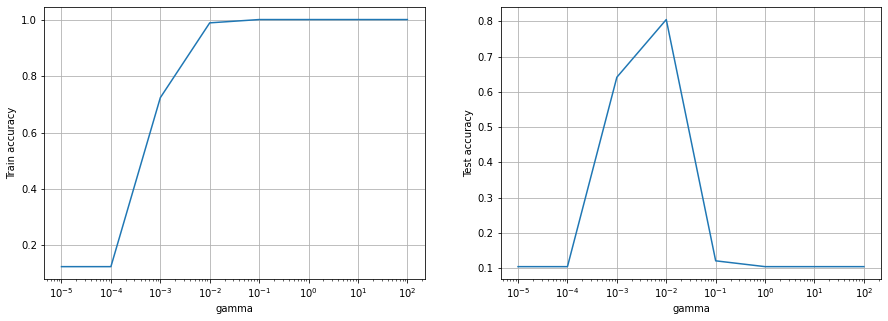

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []


# compute accuracies for every value of gamma
for gam in gamma_values:
    best_SVM = SVC(kernel="rbf", C=1, gamma=gam)
    best_SVM.fit(X_train,y_train)
    
    # append new values to the list
    train_acc_list.append(best_SVM.score(X_train,y_train))
    test_acc_list.append(best_SVM.score(X_test,y_test))


# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2 (DONE)
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue. <br>
**On one hand, when gamma is small the standard deviation of the RBF kernel is large and so the classifier has both a large training error (the distribution is too "wide" to fit properly the training data) and a large test error (that solution is not general). On the other hand, when gamma is large the standard deviation of the kernel is small and so the algorithm fits precisely the training data, but the model does not generalize well to the test data. From the plots shown above we can see that the train accuracy increases monotonically with the value of gamma, but the improvements are not significant for gammas greater than 0.01. The test accuracy is greater than 0.5 only for the values gamma=0.001 and gamma=0.01, so the model is effective only in such range. <br>
At the end, the best value of gamma is 0.01 because it maximizes the test accuracy and has a train accuracy approximately of 1.**

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # number of data points

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [211 196 203 190 198 164 198 231 205 204]


## DONE 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
# get training and test error for the best SVM model from CV
best_param = {'C': 10, 'gamma': 0.01}
best_SVM = SVC(kernel="rbf", C=best_param['C'], gamma=best_param['gamma'])
best_SVM.fit(X_train,y_train)

# compute errors
training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1- best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.114897


Just for comparison, let's also use logistic regression 

## DONE 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

LR = linear_model.LogisticRegression(C=1e5, max_iter=1e3)
LR.fit(X_train,y_train)

# compute errors
training_error = 1 - LR.score(X_train,y_train)
test_error = 1- LR.score(X_test,y_test)


print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.280069


## DONE 9 Try  with regularization (use C=1)¶

In [18]:
LRr = linear_model.LogisticRegression(C=1, max_iter=1e3)
LRr.fit(X_train,y_train)

# compute errors
training_error = 1 - LRr.score(X_train,y_train)
test_error = 1- LRr.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.001000
Best regularized logistic regression test error: 0.253759


## QUESTION 3 (DONE)
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

**With m=600 the training error is 0.000 and the test error is 0.193. With m=2000 the training error is still 0.000 and the test error is 0.115. The training is successful in both cases (training error is exactly 0), while the test gives a lower error in the classifier trained with more samples (as one would expect).<br>
The SVM with the best kernel and the best parameters has lower errors than the logistic regressions (regularized and not regularized). With a fixed number of training samples of 2000, the only training error different from 0 is the regularized-LR training error, with a value of 0.0010 (that is equivalent to only 2 misclassified training samples over 2000). The test error of the SVM is 0.115, while the non-regularized-LR test error is 0.280 and the regularized-LR test error is 0.254. But a positive feature of the LR classifier is the low computational time required by it (a few seconds on my computer with m=2000), while the SVM classifier with the same dataset requires several times more computational time (approximately a minute on my computer with m=2000). In conclusion, in order to have a more precise classification we have to spend more computational time.**

## DONE 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [19]:
LR_prediction = LRr.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

First 20 elements of the true labels and of the predictions:
LR predictions =	 [6 0 8 1 8 2 7 5 0 5 7 3 4 5 6 5 4 9 4 5]
SVM predictions =	 [6 0 8 1 8 1 7 2 0 5 7 3 4 5 6 5 4 9 9 5]
True labels =		 [6 0 2 1 8 1 7 2 0 5 7 3 4 5 2 5 4 9 9 5]

Taking the sample at index 5:
Label predicted by LR: 2
Label predicted by SVM: 1
Real label: 1 


Plot of the sample that creates confusion
INPUT:


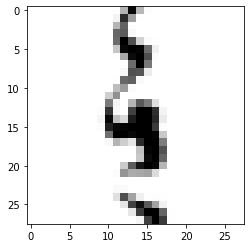

LABEL: 1


Plot of a sample that has really the label 2 (for comparison):
INPUT:


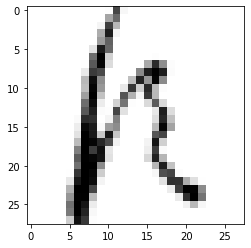

LABEL: 2


In [36]:
# show the first 20 elements of the predictions to compare
print("First 20 elements of the true labels and of the predictions:")
print("LR predictions =\t", LR_prediction[:20])
print("SVM predictions =\t", SVM_prediction[:20])
print("True labels =\t\t", y_test[:20])

# find misclassified index
mis_mask = list((SVM_prediction==y_test) & (LR_prediction!=y_test))
mis_index = mis_mask.index(True)

# plot the misclassified index of the linear regression
print("\nTaking the sample at index %i:" % mis_index)
print("Label predicted by LR: %i" % LR_prediction[mis_index])
print("Label predicted by SVM: %i" % SVM_prediction[mis_index])
print("Real label: %i \n" % y_test[mis_index])

print("\nPlot of the sample that creates confusion")
plot_input(X_test,y_test,mis_index)

print("\n\nPlot of a sample that has really the label %i (for comparison):" % LR_prediction[mis_index])
plot_input(X_test,y_test,list(y_test).index(LR_prediction[mis_index]))

## DONE 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


Labels and frequencies in test set:  [5789 5804 5797 5810 5802 5836 5802 5769 5795 5796]

 Confusion matrix SVM  
 
 [[5442   12    5   26   81   41    6   91   53   32]
 [  22 5034  118   59  146    9  179    4  118  115]
 [   0  111 4789  185   58   11  359   21  210   53]
 [  14   67  113 5320   33   78   17   46  101   21]
 [ 210  106  159   62 4963    9   72   14   96  111]
 [  60   59  169  216   54 5105   52   17   93   11]
 [  25   85  315   65  179    6 4964   67   71   25]
 [  56   20   53   48  149   25   49 5213   94   62]
 [  51  109   57   88   11   34  115   10 5303   17]
 [  39  189  145   43   84   10   11   13   59 5203]]

 Confusion matrix SVM (normalized)   
 
 [[0.940 0.002 0.001 0.004 0.014 0.007 0.001 0.016 0.009 0.006]
 [0.004 0.867 0.020 0.010 0.025 0.002 0.031 0.001 0.020 0.020]
 [0.000 0.019 0.826 0.032 0.010 0.002 0.062 0.004 0.036 0.009]
 [0.002 0.012 0.019 0.916 0.006 0.013 0.003 0.008 0.017 0.004]
 [0.036 0.018 0.027 0.011 0.855 0.002 0.012 0.002 0.017 0.

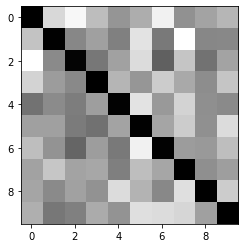



 Confusion matrix LR  
 
 [[5076   17   36   58  113  177   14  127   42  129]
 [  28 4213  313  110  272   81  322   25  219  221]
 [   9  317 3612  231  151  109  609   59  449  251]
 [  38  128  145 4430   84  388   60  173  290   74]
 [ 285  187  288  162 4128   51  157   82  110  352]
 [ 142  112  390  322   85 4406  125   59  150   45]
 [  25  243  463   98  243   75 4305  102  185   63]
 [ 128   42  187  112  234  154  132 4523   94  163]
 [ 127  294  344  203   64  163  225   21 4248  106]
 [ 116  350  384   55  229   55   61   86  119 4341]]

 Confusion matrix LR (normalized)   
 
 [[0.877 0.003 0.006 0.010 0.020 0.031 0.002 0.022 0.007 0.022]
 [0.005 0.726 0.054 0.019 0.047 0.014 0.055 0.004 0.038 0.038]
 [0.002 0.055 0.623 0.040 0.026 0.019 0.105 0.010 0.077 0.043]
 [0.007 0.022 0.025 0.762 0.014 0.067 0.010 0.030 0.050 0.013]
 [0.049 0.032 0.050 0.028 0.711 0.009 0.027 0.014 0.019 0.061]
 [0.024 0.019 0.067 0.055 0.015 0.755 0.021 0.010 0.026 0.008]
 [0.004 0.042 0.080 0.

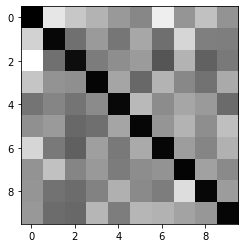

In [39]:
np.set_printoptions(precision=3, suppress=True, floatmode="fixed")

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

# print confusion matrix for SVM classifier
confusion_SVM = sklearn.metrics.confusion_matrix(y_test,SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None])
print("\nPlot confusion matrix for SVM")
plt.imshow(confusion_SVM /counts[:,None], norm=colors.LogNorm(), cmap="gray_r")
plt.show()

# print confusion matrix for LR classifier
confusion_LR = sklearn.metrics.confusion_matrix(y_test,LR_prediction)
print("\n\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None])
print("\nPlot confusion matrix for LR")
plt.imshow(confusion_LR /counts[:,None], norm=colors.LogNorm(), cmap="gray_r")
plt.show()

## QUESTION 4 (DONE)
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes. <br>

**The next considerations are based on the confusion matrix of the SVM classifier. In the heatmap plotted above it is possible to see some white pixels corresponding to an high percentage of samples correctly classified, while the darker pixels corresponds to a lower percentage of samples correctly classified. To search for explanations I have added some code cells below to show the two extreme examples of figures wrongly classified (the least misclassified and the most misclassified ones).<br>
From the comparison it is possible to see that the images that are likely to be confused have the same number of "horizontal stripes" that are completely white. For example, the images corresponding to label 2 and label 6 have at least a black pixel on the first row and similarly they have at least a black pixel on the last row. While the image corresponding to label 0 has the first few rows and the last few rows that are completely white. This effect that I found comparing the most misclassified and the least misclassified samples is also true for less "extreme" cases. For example, labels = [0 vs 2 (minimum_misclassified = 0) ; 1 vs 7 (minimum_misclassified = 4) ; 0 vs 6 (minimum_misclassified = 6) ; 1 vs 5 (minimum_misclassified = 9)] shows this effect (I prepared the third cell below this cell text to see easily such difference). They are unlikely to be misclassified because their first few and last few rows are very different. For the opposite example, labels = [2 vs 6 (maximum_misclassified = 359) ; 3 vs 5 (maximum_misclassified = 216) ; 2 vs 8 (maximum_misclassified = 210) ; 0 vs 4 (maximum_misclassified = 210)] have similar first few rows and last few rows and are also easily misclassified.<br>
I suppose this is caused by the RBF kernel and by the fact that the pixels are stored as a single row in the original "X_test" matrix of test samples. If the first few rows of the picure are completely white, the corresponding one-line vector has the first 40/50 pixels white and similarly for the last 40/50 pixels of that vector. The SVM classifier used with the RBF kernel is very good at discriminating these completely white regions from the regions in which white and black pixels coexists and so the classification is more successful when the first and last few rows are different.**

Labels of the two least misclassified samples:  (2, 0)
INPUT:


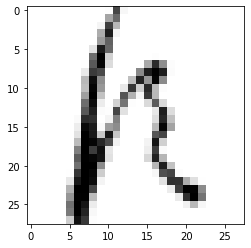

LABEL: 2
INPUT:


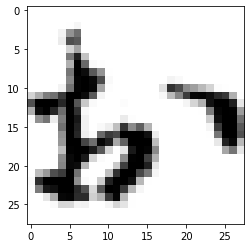

LABEL: 0


In [22]:
# show the difference between the two least misclassified labels
y1, y2 = np.unravel_index(np.argmin(confusion_SVM, axis=None), confusion_SVM.shape)
print("Labels of the two least misclassified samples: ", (y1,y2))

plot_input(X_test,y_test,list(y_test).index(y1))
plot_input(X_test,y_test,list(y_test).index(y2))

Labels of the two most misclassified samples:  (2, 6)
INPUT:


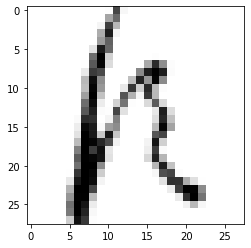

LABEL: 2
INPUT:


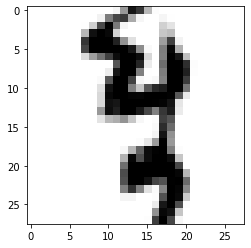

LABEL: 6


In [23]:
# show the difference between the two most misclassified labels
#
# I found the maximum value over a matrix with the diagonal entries that are below zero and so they
# are not chosen by the maximum algorithm
y1, y2 = np.unravel_index(np.argmax((confusion_SVM /counts[:,None]) - np.identity(10), axis=None), confusion_SVM.shape)
print("Labels of the two most misclassified samples: ", (y1,y2))

plot_input(X_test,y_test,list(y_test).index(y1))
plot_input(X_test,y_test,list(y_test).index(y2))

INPUT:


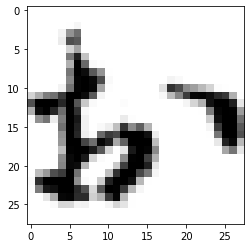

LABEL: 0
INPUT:


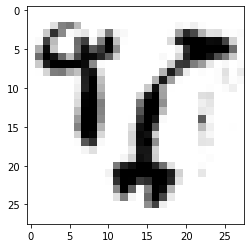

LABEL: 4

Misclassified samples for the labels (0, 4) = 81, 210


In [24]:
# use this cell to see easily the different labels

y1, y2 = 0,4
plot_input(X_test,y_test,list(y_test).index(y1))
plot_input(X_test,y_test,list(y_test).index(y2))

print("\nMisclassified samples for the labels (%i, %i) = %i, %i" %\
      (y1,y2,confusion_SVM[y1,y2], confusion_SVM[y2,y1]))
